## k Nearest Neighbor Classifier Example #1


*Section 2.3  
Pages 33-35*

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Training Data: Two 2-dimensional data classes, each generated with 10 gaussian clusters with random means and std of 1

In [188]:
X, y = make_blobs(n_samples=200, centers=20, n_features=2, cluster_std=1, random_state=1)
y = np.where(y < 10, 0, 1)


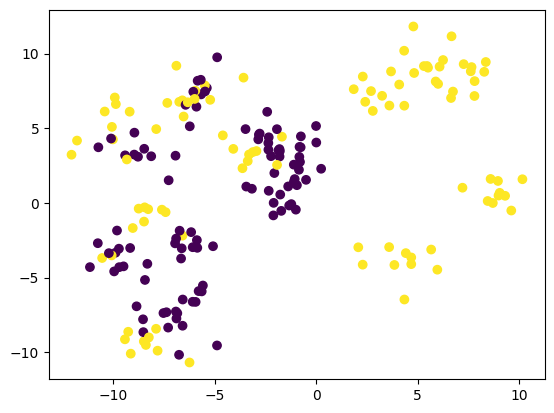

In [189]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

$N_k(x)$: neighborhood of $x$ defined by the $k$ closest points $x_i$ the training sample

In [190]:
N = lambda x, k: np.argsort(np.linalg.norm(X - x, axis=1))[:k]

### Fitted $\hat{Y}$ for all data points

$$\hat{Y}(x)=\frac{1}{k}\sum\limits_{x_i\in N_k(x)}y_i$$

In [191]:
Y_hat = lambda x, k: 1/k * np.sum(y[N(x, k)])

### Class Variable $\hat{G}$
$$\hat{G}=\begin{cases} \mathrm{\color{red}RED} & \quad \text{if } \hat{Y} > 0.5, \\ \mathrm{\color{blue}BLUE} & \quad \text{if } \hat{Y} \leq 0.5 \end{cases}$$

In [192]:
G_hat = lambda x, k: np.where(Y_hat(x, k) < 0.5, 0, 1)

### Plot decision boundary for $K=15$

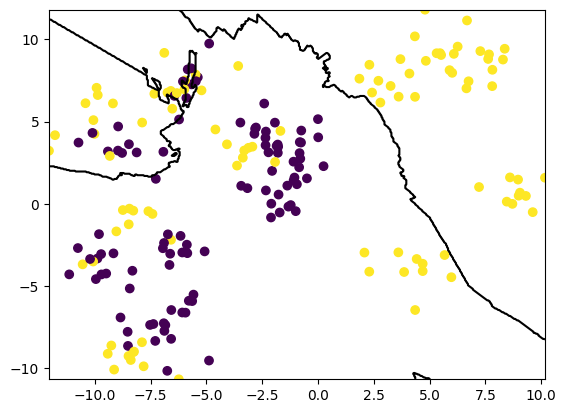

In [197]:
K = 15

x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 500)
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 500)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
y_grid = np.array([G_hat(x, K) for x in X_grid])
y_grid = y_grid.reshape(X1.shape)
plt.contour(X1, X2, y_grid, colors='k', levels=[0.5])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()